# Planning Stage: Data Description & Exploratory Data Analysis
#### STAT 301 Group 13 
#### #84356377 Yuki Matsushima

In [1]:
library(tidyverse)

Warning message:
“package ‘lubridate’ was built under R version 4.4.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## (1) Data Description

### Description:
The Sleep Health and Lifestyle Dataset consists of 374 observations and 13 variables related to individuals' sleep habits, physical health, and lifestyle choices. It aims to analyze the factors influencing sleep quality and overall well-being. This dataset is clarified as synthetic and created by Laksika Tharmalingam for illustrative purposes, can be retrieved through Kaggle. (https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?resource=download)

### Variables:
|Variable Name|Type|Description|
|-------------|----|-----------|
|`Person ID`|Integer|An identifier for each individual.|
|`Gender`|Categorical|The gender of the person (Male/Female).|
|`Age`|Integer|The age of the person in years.|
|`Occupation`|String|The occupation or profession of the person.|
|`Sleep Duration`|Float|The number of hours the person sleeps per day.|
|`Quality of Sleep`|Integer|A subjective rating of the quality of sleep, ranging from 1 to 10.|
|`Physical Activity Level`|Integer|The number of minutes the person engages in physical activity daily.|
|`Stress Level`|Integer|A subjective rating of the stress level experienced by the person, ranging from 1 to 10.|
|`BMI Category`|Categorical|The BMI category of the person (Underweight, Normal, Overweight).|
|`Blood Pressure`|String|The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. (stored as a character)|
|`Heart Rate`|Integer|The resting heart rate of the person in beats per minute.|
|`Daily Steps`|Integer|The number of steps the person takes per day.|
|`Sleep Disorder`|Categorical|The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).|

### Pre-selection Variables
`Person ID` can be discarded since they contain redundant information and won't be needed for future analysis. \
`Occupation` could be discarded too since they are not a health factor, thus would not be useful for prediction of sleep disorders.

# (2) Question

a) ***"Can various health factors predict the likelihood of having a sleep disorder?"*** \
Response: `Sleep Disorder` by converting them into binary values (1 = Yes, 0 = No). Uses Logistic Regression.


b) My question is focused on **prediction** because I aim to build a logistic regression model that estimates the likelihood of having a sleep disorder based on various health factors. By using multiple predictors such as physical activity level and heart rate, the goal is to develop a model that can classify individuals as likely or unlikely to have a sleep disorder. The emphasis is on the model’s predictive accuracy, rather than understanding the causal relationships. 

# (3) Exploratory Data Analysis and Visualization

In [5]:
# read the dataset
sleep_data <- read_csv("https://raw.githubusercontent.com/yma24ma/stat301_project/refs/heads/main/Sleep_health_and_lifestyle_dataset.csv") 

# convert the variable names into snake_case format
colnames(sleep_data) <- gsub(" ", "_", tolower(colnames(sleep_data)))

# split the blood_pressure variable into systolic_bp and diastolic_bp and mutate into a numerical format
sleep_data <- sleep_data |>
separate(blood_pressure, into = c("systolic_bp", "diastolic_bp")) |>
mutate(systolic_bp = as.numeric(systolic_bp),
       diastolic_bp = as.numeric(diastolic_bp))

# mutate bmi_category into "Underweight", "Normal", "Overweight", and "Obese"
# I chose to keep "Obese" since it's recognized by the governemnt of Canada as one of the classification of BMI
sleep_data <- sleep_data |>
mutate(bmi_category = if_else(bmi_category %in% c("Normal", "Normal Weight"), "Normal", bmi_category))


head(sleep_data)

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,systolic_bp,diastolic_bp,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125,80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140,90,85,3000,Insomnia


Table. 1

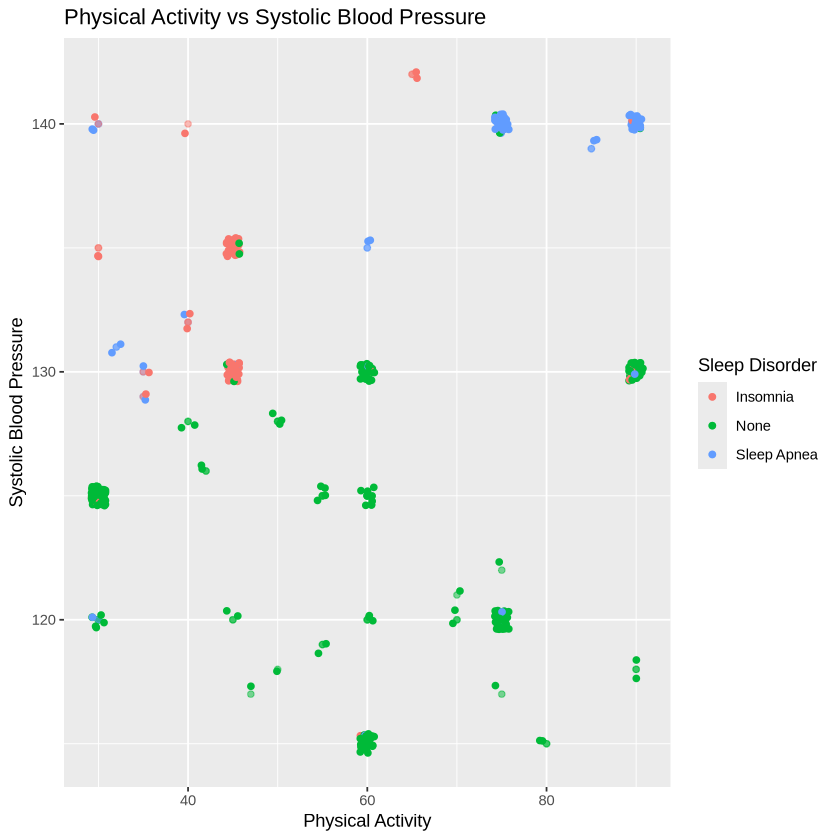

In [6]:
pa_sbp_plot <- sleep_data |>
ggplot(aes(x = physical_activity_level, y = systolic_bp, color = sleep_disorder)) +
geom_point(alpha = 0.5) +
geom_jitter() +
labs(title = "Physical Activity vs Systolic Blood Pressure", x = "Physical Activity", y = "Systolic Blood Pressure", color = "Sleep Disorder")

pa_sbp_plot

Plot. 1

### Interpretation
This plot is relevant to addressing my research question because it visually explores the relationship between physical activity level, systolic blood pressure, and sleep disorders. Since my study aims to predict the likelihood of having a sleep disorder based on various health factors, this visualization helps in understanding wether physical activity and blood pressure level differ among individuals with and without sleep disorders. I chose those variables because they are key health factors that could be associated with sleep disorders and they do not involve subjective rating (such as quality_of_sleep and stress_level) and also are not rounded up or down heavily (such as daily_steps).

From Plot. 1, we can observe potential clustering patterns based on sleep disorder categories. It looks like the people with higher systolic blood pressure tends to have more sleep disorders since most of the blue and red plots are scattered on the top half of the scatter plot. 

-----------------------------------------------------------------------------------------------------------------------------------

# (1) Methods and Plan

### Method:
blah blah.

**Why is this method appropriate?**

**Which assumptions are required, if any, to apply the method selected?**

**What are the potential limitations or weaknesses of the method selected?**

# (2) Computational Code and Output

# (3) Mechanics